<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/CosmicNeutrons/Neutrons_vs_muons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Init

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from scipy.interpolate import interp1d

%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_dzhadan')
import math

!pip install fsspec
import dask.dataframe as dd

S = pow(100*100, 2) #100x100 m2 in cm2 - simulated area

     |████████████████████████████████| 117 kB 5.9 MB/s 
     |████████████████████████████████| 87 kB 3.9 MB/s 
     |████████████████████████████████| 5.9 MB 5.4 MB/s 
Mounted at /content/drive
     |████████████████████████████████| 133 kB 5.4 MB/s 


In [2]:
!pip install -I git+https://github.com/oksuzian/mu2etools.git
from mu2etools import utils, cuts

  Cloning https://github.com/oksuzian/mu2etools.git to /tmp/pip-req-build-iaipy2_m
  Running command git clone -q https://github.com/oksuzian/mu2etools.git /tmp/pip-req-build-iaipy2_m
     |████████████████████████████████| 63 kB 857 kB/s 
     |████████████████████████████████| 149 kB 10.9 MB/s 
     |████████████████████████████████| 61 kB 4.4 MB/s 
     |████████████████████████████████| 138 kB 45.2 MB/s 
  Created wheel for mu2etools: filename=mu2etools-0.0.1-py3-none-any.whl size=5431 sha256=4e5801e3cf44679416c926f1e061efe47b168d66660cc7733c32e5193ad1d6b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-vgs9fk1p/wheels/00/92/a8/d2a2c55928a20d8675652a7135b8880f1f4f9b655d8885d452
Successfully built mu2etools
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datas

In [3]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.7
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

#Plot CRY4

In [19]:
var_dict = utils.getVarList('all')

In [24]:
for var in var_dict.keys():
  print(var)
  print(var_dict[var])

crvinfo__x
[-8000, 1000]
crvinfo__y
[0, 3500]
crvinfo__z
[-5000, 20000]
de_nhits
[-2, 100]
ue_nhits
[-2, 100]
dequal_TrkPID
[-1.1, 1.1]
dequal_TrkQual
[-0.1, 1.1]
deent_td
[0, 10]
deent_z0
[-500, 500]
deent_d0
[-500, 500]
deent_om
[-0.01, 0.05]
crvinfo__PEs
[-1, 1000]
crvinfo__dT
[-500, 500]
deent_mom
[50, 200]
deent_d0_om
[300, 1200]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]


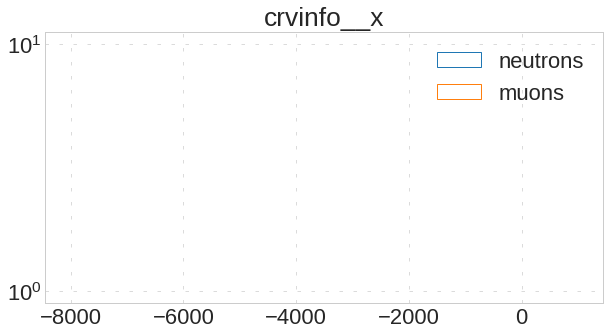

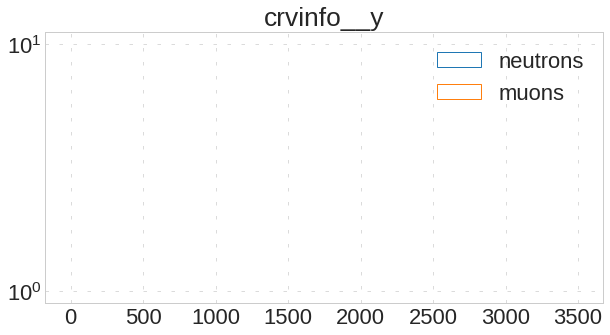

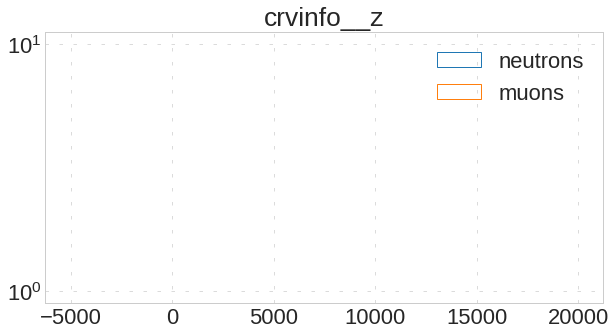

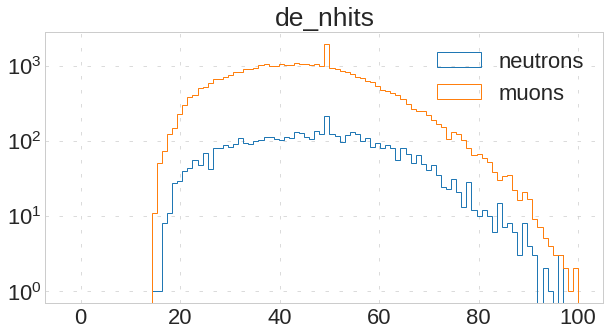

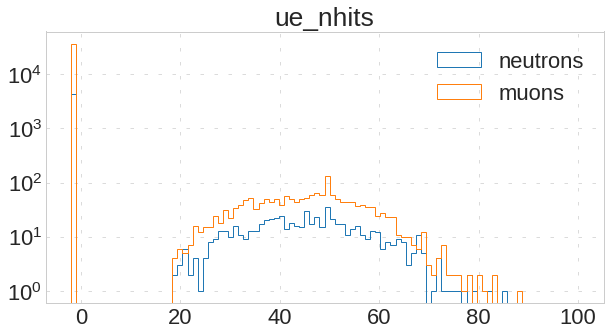

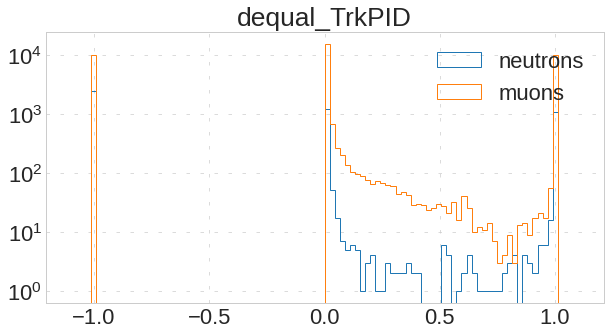

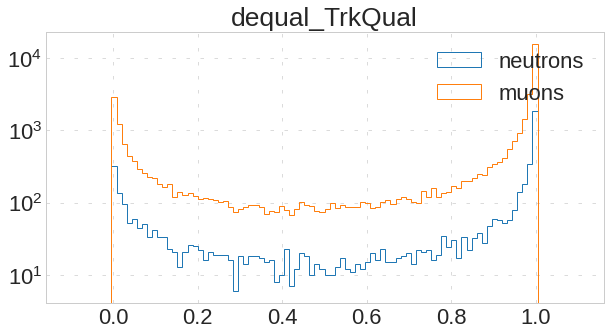

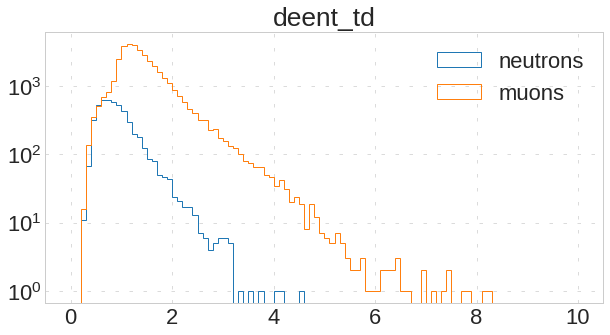

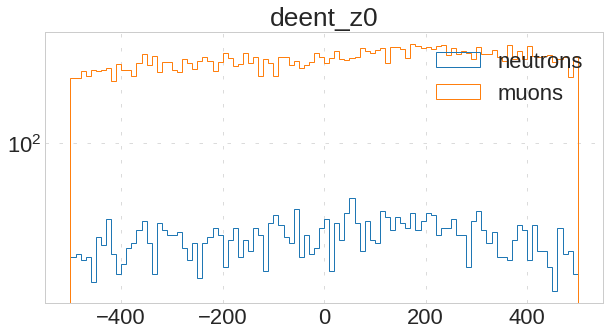

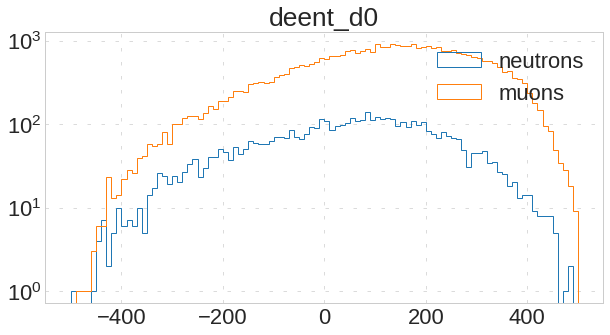

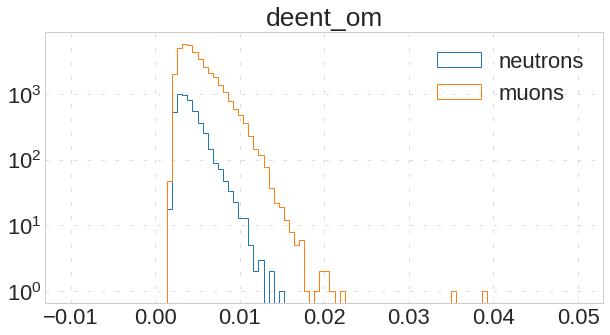

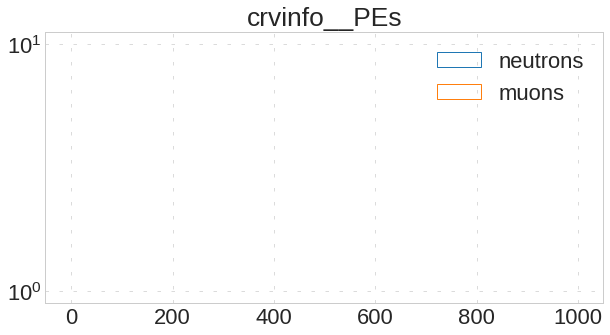

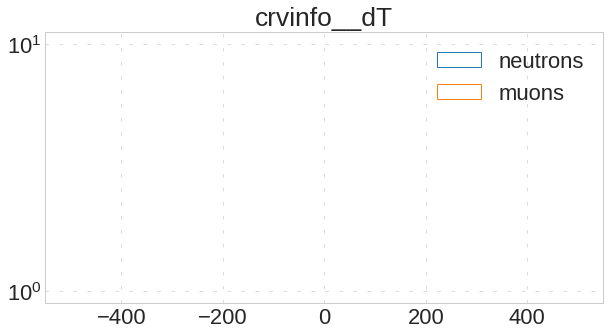

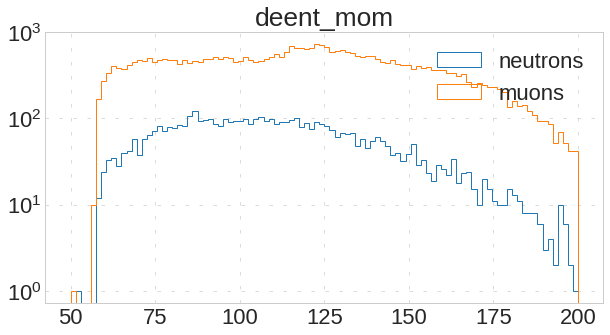

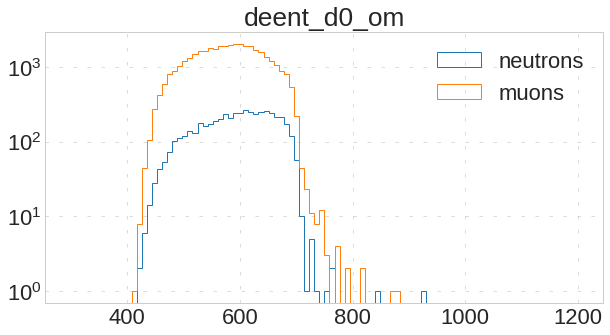

In [29]:
try:
    dfCRY4
except NameError:
    dfCRY4 = pd.read_hdf(main_path + "root_files_cry4/cry4df.h5").query('(lyield==15000)')

vars = ['dequal_TrkPID', 'deent_td']

for var in var_dict.keys():
  plt.figure()
  plt.title(var)
  plt.hist(dfCRY4.query('demcgen_pdg==2112  & crvinfo__timeWindowStart<0')[var], bins=100, range=var_dict[var], histtype='step', label='neutrons');
  plt.hist(dfCRY4.query('abs(demcgen_pdg)==13 & crvinfo__timeWindowStart<0')[var], bins=100, range=var_dict[var], histtype='step', label='muons');
  plt.yscale('log')
  plt.legend()


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


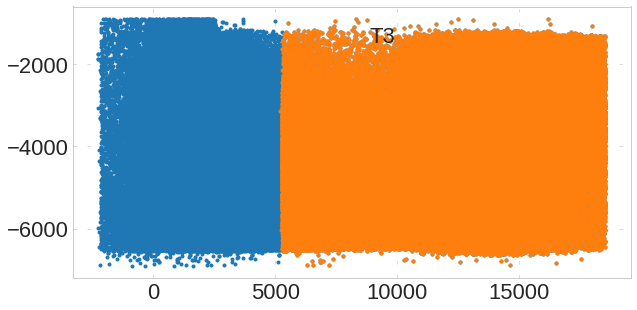

In [40]:
dftmp = dfCRY4.query('_z>-80000')
plt.plot(dftmp.query('_crvSectorType==3')._z, dftmp.query('_crvSectorType==3')._x, '.');
plt.plot(dftmp.query('_crvSectorNumber==10')._z, dftmp.query('_crvSectorNumber==10')._x, '.', label='T3');
plt.legend()